In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_csv('data/real_estate.csv')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Выбор признаков (фич)

<AxesSubplot:>

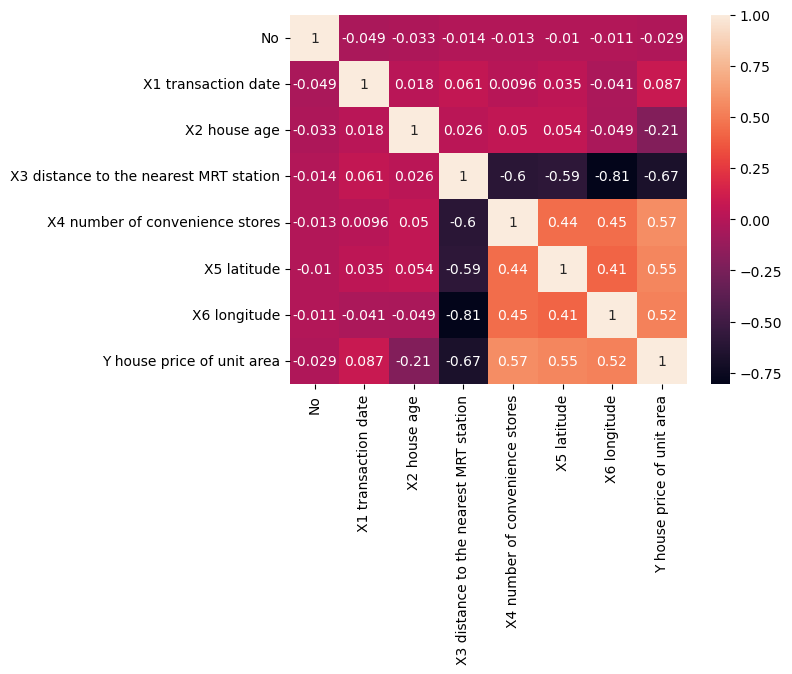

In [7]:
sns.heatmap(df.corr(), annot=True)

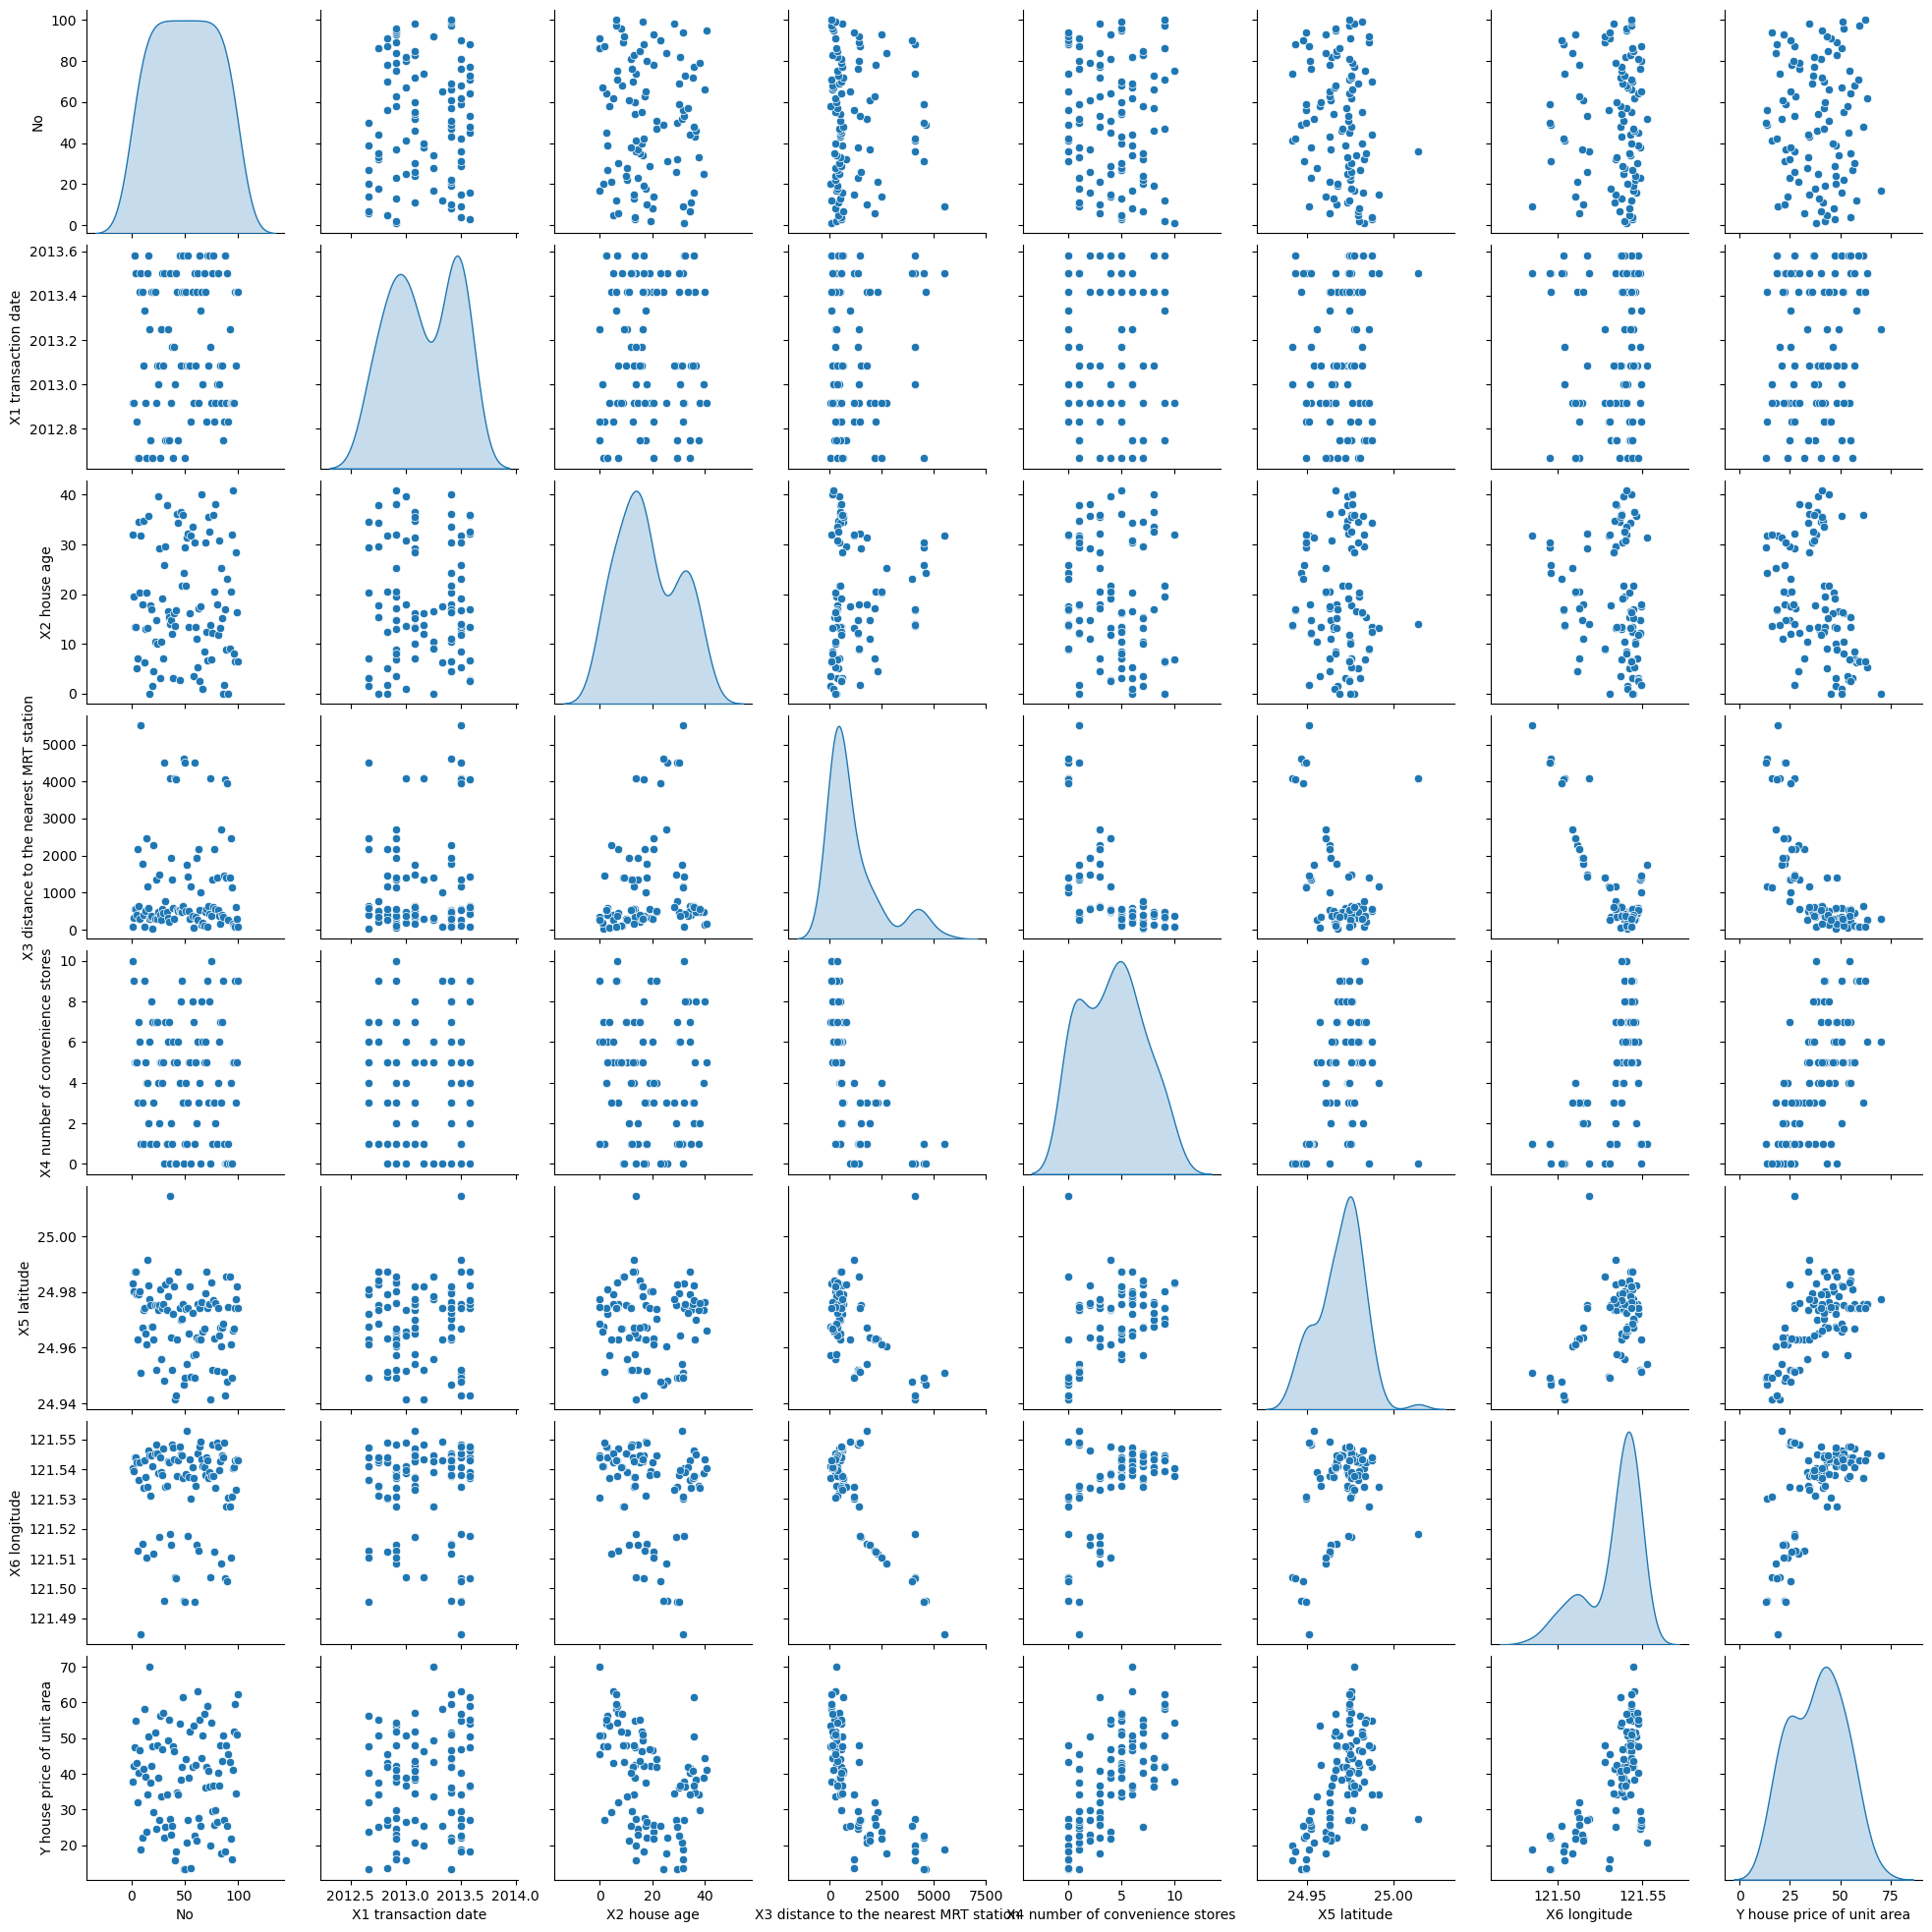

In [8]:
sns.pairplot(df.head(100), diag_kind='kde')#

# Собираем датасет

In [45]:
X=df.drop(['No', 'Y house price of unit area'], axis=1)

y=df['Y house price of unit area']

In [46]:
X.shape, y.shape

((414, 6), (414,))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Линейная регрессия

In [48]:
model = LinearRegression()

In [49]:
model.fit(X_train, y_train)

LinearRegression()

In [50]:
model.coef_

array([ 5.20879385e+00, -2.75620296e-01, -4.59777862e-03,  1.01884815e+00,
        2.30117600e+02, -8.72312677e+00])

In [51]:
pd.DataFrame(model.coef_, X_train.columns)

,0
X1 transaction date,5.208794
X2 house age,-0.275620
X3 distance to the nearest MRT station,-0.004598
X4 number of convenience stores,1.018848
X5 latitude,230.117600
X6 longitude,-8.723127


# Оценка модели

In [52]:
y_pred = model.predict(X_test)

In [53]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)

In [54]:
MAE

6.057843422451238

In [55]:
MSE

71.58131577256334

In [56]:
MAE / y_train.mean()

0.158031173473223